<a href="https://colab.research.google.com/github/Sagar-Kamat/GRIP/blob/main/Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sagar Kamat**
**Task 2: Prediction using unsupervised Machine Learning**

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing dataset
df = pd.read_csv("iris.csv")

In [3]:
# printing the top 10 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# printing the basic statistical info of the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# printing bottom 10 rows
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
# printing the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# printing the dimensions of the data
df.shape

(150, 5)

In [8]:
# checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

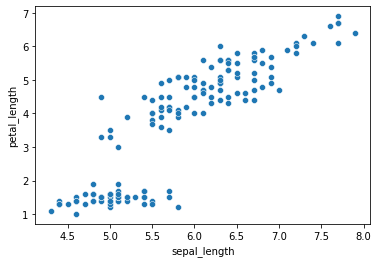

In [9]:
# plotting sepal length vs petal length
sns.scatterplot(x=df['sepal_length'],y=df['petal_length'])

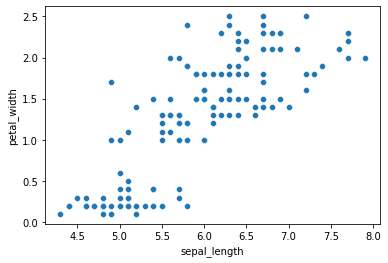

In [10]:
# plotting sepal length vs petal width
sns.scatterplot(x=df['sepal_length'],y=df['petal_width'])

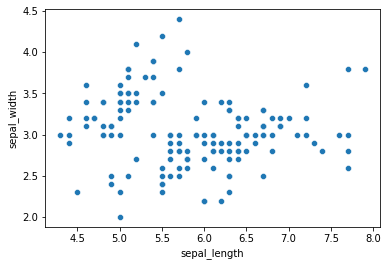

In [11]:
# plotting sepal length vs sepal width
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'])

In [12]:
# printing number of distinct observations
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

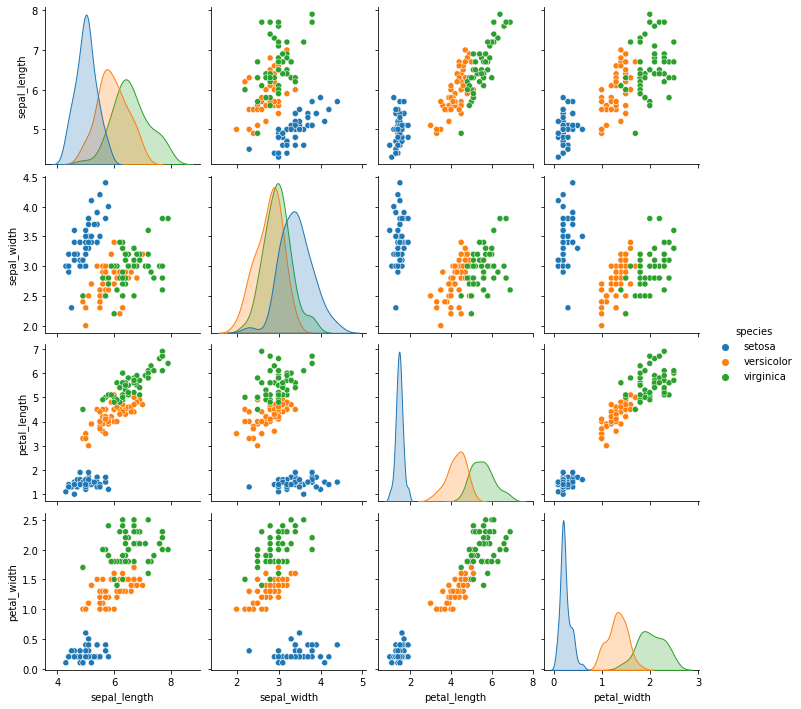

In [13]:
# plotting pairwise relationships
sns.pairplot(df,hue ='species')

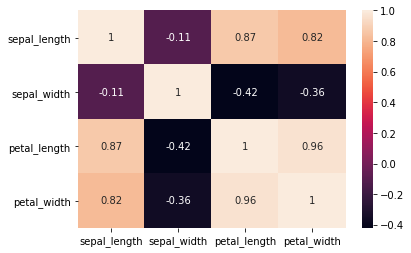

In [14]:
# plotting heatmap 
sns.heatmap(df.corr(),annot=True)

In [15]:
x = df.iloc[:, [0, 1, 2, 3]].values
#Finding the optimal number of clusters
from sklearn.cluster import KMeans
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
    
sse

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.19068792479662,
 29.88917890442891,
 28.186402210510906]

Text(0, 0.5, 'Sum of Squared Error (SSE)')

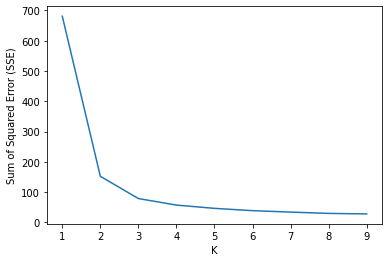

In [16]:
#Elbow plot
import matplotlib.pyplot as plt

plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error (SSE)')

In [17]:
#Model
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(x)

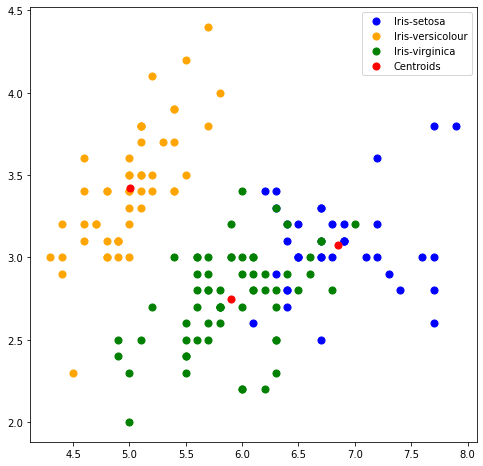

In [18]:
#Plotting the clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

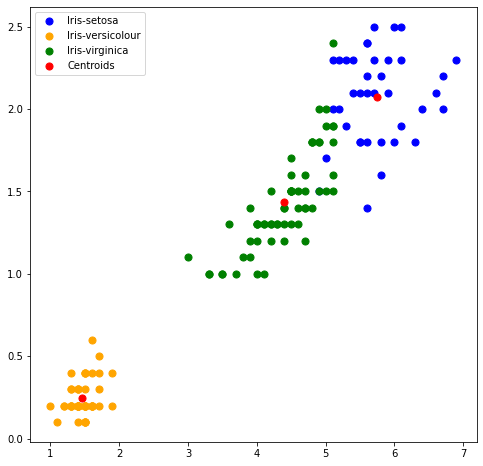

In [19]:
# # Visualising the clusters - On the third and fourth columns
#Plotting the clusters
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting centroids of the clusters
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s = 50, c = 'red', label = 'Centroids')

plt.legend()